# Regular expression

Python's re Module

re module

split: split a string on regex

findall: find all patterns in a string

search: search for a pattern

match: match an entire string or substring based on a pattern

search can look in the entire word but match uses the start of the word

The synthax for the regex library is always to pass the Pattern first, and the string second

May return an iterator, string, or match object


for the regex library is to always to pass the pattern first, and then the string second.

Unlike the syntax for the regex library, with nltk_tokenize() you pass the pattern as the second argument.


# Tokenization

Turning a string or document into tokens (smaller chunks)

One step in preparing a text for NLP

Most commond libarary:  nltk

Tokenizer libraries:

1. sent_tokenize: tokenize a document into sentences. word_tokenize can devide it further to workds. also set(word_tokenize(sentence))  gives the unique words. Here you dont need to use a patters.


2. regexp_tokenize: tokenize a string or document based on a regular expression pattern (you need to define a patter)
regexp_tokenize(text, pattern)

3. TweetTokenizer: special class just for tweet tokenization, allowing you to separate hashtags, mentions and lots of exclamation points!!!

In [21]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

In [22]:
import re

# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


In [44]:
text= open("Newsarticles/grail.txt")
scene_one =text.read()

In [47]:
import nltk

# Import necessary modules
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
#print(unique_tokens)

# Regex with NLTK tokenization
Twitter is a frequently used source for NLP text and tasks. In this exercise, you'll build a more complex tokenizer for tweets with hashtags and mentions using nltk and regex. The nltk.tokenize. TweetTokenizer class gives you some extra methods and attributes for parsing tweets.

Here, you're given some example tweets to parse using both TweetTokenizer and regexp_tokenize from the nltk.tokenize module. These example tweets have been pre-loaded into the variable tweets. Feel free to explore it in the IPython Shell!

In [25]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w|\s]+:"
print(re.match(pattern2, scene_one))

<re.Match object; span=(0, 8), match='SCENE 1:'>


In [26]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, scene_one))

<re.Match object; span=(0, 8), match='SCENE 1:'>


In [48]:
holy_grail = scene_one

# Example:  
Please write a short code that counts the number of words in each line of above text and plot it.

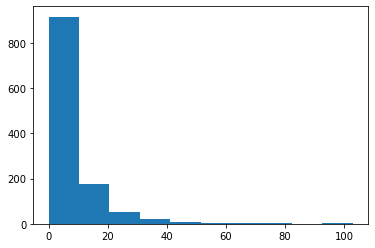

In [49]:

# Import necessary modules
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
import matplotlib.pyplot as plt


# Split the script into lines: lines \n devide it into lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker such as ARTHUR: and SOLDIER #1
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line to words: tokenized_lines
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

# Word counts with bag-of-words
- Basic method for finding topics in a text

- The more frequent a word, the more important it might be

- Can be a great way to determine the significant words in a text


Process:

1. Import the related package: from collections import Counter

2. Tokenize the text


Preprocessing:

1. Make all the words as lowercase: t.lower() for t in tokens

2. Lemmatization/Stemming: Shorten words to their root stems

3. Removing stop words, punctuation, or unwanted tokens
   from ntlk.corpus import stopwords
   
4. make sure to work just on alphabetical words by  
    tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]



Example:

In [29]:
text= open("Wikipediaarticles/wiki_text_debugging.txt")
article =text.read()


In [30]:
import nltk
nltk.download('wordnet')

# Import Counter
from collections import Counter
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]


# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]


# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]


# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lemmatized)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hamid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hamid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[('debugging', 40), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]


# Gensim

It is an open-source NLP library, where uses top academic models to perform complex tasks such as building document or word vectors
and performing topic identification and document comparison. We can also biuld a corpora and dictionaries.


Computational methodes:
1. Preprocessing such as lowecase and tokenizing.
2. Use the dictionary of gensim.corpora to provide a dictionary of words.


Word vectors are multi-dimensional mathematical representations of words created using deep learning methods. They give us insight into relationships between words in a corpus.

## Corpus
Gensim corpus is a list of lists, each list item represeinting one document. 

corpus = [[(0, 1), (1, 1), ..., (11, 1), (12, 1)]]

Each document is a series of tuples, the first item representing the token_id from the dictionary and the second item shows the frequency in the document.

Example: We'll use these data structures to investigate word trends and potential interesting topics in the document set.


## Example: Analysis of Wikipedia articles:
During this excersize we collect all the text article and provide corpus with gensim. Then we use the new gensim corpus and dictionary to see the most common terms per document and across all documents



 Extra adopted tools:
 Allows us to initialize a dictionary that will assign a default value to non-existent keys. Defaultdict is a container like dictionaries present in the module collections. Defaultdict is a sub-class of the dict class that returns a dictionary-like object. The functionality of both dictionaries and defualtdict are almost same except for the fact that defualtdict never raises a KeyError. It provides a default value for the key that does not exists.
 
 

In [31]:
from collections import defaultdict 
 
# Function to return a default 
# values for keys that is not 
# present 
def def_value(): 
    return "Not Present"
      
# Defining the dict 
d = defaultdict(def_value) 
d["a"] = 1
d["b"] = 2
  
print(d["a"]) 
print(d["b"]) 
print(d["c"]) 

1
2
Not Present


In [32]:
import os  
import numpy as np
file_list = os.listdir("Wikipediaarticles") 
lemmatized = []
for  file_name in file_list:
      with open(os.path.join("Wikipediaarticles", file_name),  encoding="utf8") as src_file:  
            tokens = word_tokenize(src_file.read())
            
            # Convert the tokens into lowercase: lower_tokens
            lower_tokens = [t.lower() for t in tokens]

            # Retain alphabetic words: alpha_only
            alpha_only = [t for t in lower_tokens if t.isalpha()]


            # Remove all stop words: no_stops
            no_stops = [t for t in alpha_only if t not in stopwords.words('english')]


            # Instantiate the WordNetLemmatizer
            wordnet_lemmatizer = WordNetLemmatizer()

            # Lemmatize all tokens into a new list: lemmatized
            lemmatized.append([wordnet_lemmatizer.lemmatize(t) for t in no_stops])

  
            # data = list.append(lemmatized)
    
np.size(lemmatized)

12

In [33]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary

from itertools import *
import itertools

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(lemmatized)

# Create a MmCorpus: corpus from the dictionary
corpus = [dictionary.doc2bow(article) for article in lemmatized]


print(corpus[4][:10])


# Save the fifth document: doc
doc = corpus[4]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count 
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

[(1, 1), (13, 1), (14, 1), (17, 1), (24, 1), (27, 1), (33, 1), (34, 4), (42, 2), (43, 7)]
debugging 40
system 25
bug 17
software 16
problem 15
computer 753
software 450
program 341
cite 322
language 320


## Tf-idf with gensim
stands for Term frequency - inverse document frequency. Allows you to determine the most important words in each document. The idea behind tf-idf is that each corpus may have shared words beyond just stopwords. These words should be down-weighted in importance. For example the word of sky in the field of astronomy. If a word is repeated alot in the documant it will have a low weight. 

In [34]:
from gensim.models.tfidfmodel import TfidfModel

# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

[(1, 0.012873099301958887), (13, 0.012873099301958887), (14, 0.012873099301958887), (17, 0.012873099301958887), (24, 0.02040337966166453)]


Sort the term ids and weights in a new list from highest to lowest weight. This has been done for you.
Using your pre-existing dictionary, print the top five weighted words (term_id) from sorted_tfidf_weights, along with their weighted score (weight).


In [35]:
# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

[(1, 0.012873099301958887), (13, 0.012873099301958887), (14, 0.012873099301958887), (17, 0.012873099301958887), (24, 0.02040337966166453)]
wolf 0.23074789132791154
debugging 0.21371275769012985
fence 0.18459831306232924
squeeze 0.13844873479674694
tron 0.13844873479674694


# Named Entity Recognition (NER)
NLP task to identify important named entities in the text. People, places, organizations. Dates, states, works of art and others... in this process we need to tage a sentence. In this process we need to tag sentences  for parts of speech. This wll add tags for proper nouns, pronouns, advective and verbs. 

We can see below that this can identify names, verbs and persons names with out consulting a knowlege base, like wikipedia, but it uses the statistical and grammatical parsers.


 import nltk

sentence = '''In New York, I like to ride the Metro to visit MOMA 
                      and some restaurants rated well by Ruth Reichl.'''

tokenized_sent = nltk.word_tokenize(sentence)

tagged_sent = nltk.pos_tag(tokenized_sent)

tagged_sent[:3]
[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')


Then we pass this sentence to the chunk function

print(nltk.ne_chunk(tagged_sent))
(S
  In/IN
  
  (GPE New/NNP York/NNP)
  
  ,/,
  
  I/PRP
  
  like/VBP
  
  to/TO
  
  ride/VB
  
  the/DT
  
  (ORGANIZATION Metro/NNP)
  
  to/TO
  
  visit/VB
  
  (ORGANIZATION MOMA/NNP)
  
  and/CC
  some/DT
  restaurants/NNS
  
  
  
  
we see that new and york is taged by NNP which is the tag for the proper noun, and sigular.
Extra tools:
Inside a list comprehension, tag each tokenized sentence into parts of speech using nltk.pos_tag().


In [36]:
text= open("Newsarticles/uber_apple.txt", encoding="utf8")
article =text.read()

In [37]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


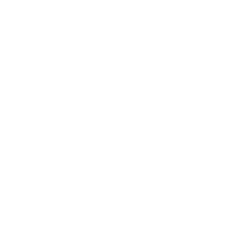

In [50]:
import matplotlib.pyplot as plt 

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()


# SpaCy
NLP library similar to gensim, with different implementations. It Focuses on creating NLP pipelines to generate models and corpora. Open-source, with extra libraries and tools. It has a nice tools with the name of Displacy entity recognition visualizer.

(source: https://demos.explosion.ai/displacy-ent/)

List of categorie that spacy uses instead of nltk in its named-entity recognition: NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE, EVENT


In [39]:
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm', tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG Uber
PERSON Uber
ORG unroll.me
ORG Apple
PERSON Uber
PERSON Travis Kalanick
PERSON Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY $186m


# polyglot
The main advantage of this library is that is uses a wide variety of languages it supports. It has more than 130 languages.

from polyglot.text import Text